### **Unsupervised Learning : K-Means Clustering**

In [1]:
#import libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display all column and row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#load dataset
data = pd.read_csv('../dataset/data.csv')

In [4]:
data.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,Product Name,Price_y,StoreName,GroupStore,Type,Age,Gender,Marital Status,Income
154,TR57918,72,2022-11-01,P4,12000,5,60000,Potato Chip,12000,Lingga,Lingga,Modern Trade,26,0,Single,"1,81"
524,TR17222,32,2022-07-02,P6,18000,2,36000,Cashew,18000,Buana Indah,Buana,General Trade,34,0,Married,"10,96"
2555,TR92085,378,2022-01-07,P10,15000,1,15000,Cheese Stick,15000,Priangan,Priangan,Modern Trade,54,0,Married,"14,66"
3311,TR17660,209,2022-08-29,P6,18000,3,54000,Cashew,18000,Prestasi Utama,Prestasi,General Trade,47,0,Single,"2,55"
3096,TR18564,192,2022-08-13,P6,18000,1,18000,Cashew,18000,Prima Tendean,Prima,Modern Trade,26,0,Single,"4,47"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   Product Name    5020 non-null   object
 8   Price_y         5020 non-null   int64 
 9   StoreName       5020 non-null   object
 10  GroupStore      5020 non-null   object
 11  Type            5020 non-null   object
 12  Age             5020 non-null   int64 
 13  Gender          5020 non-null   int64 
 14  Marital Status  5020 non-null   object
 15  Income          5020 non-null   object
dtypes: int64(7), object(9)
memory usage: 627.6+ KB


In [6]:
# new_df['Product Name'].value_counts()

In [7]:
# def product (x):
#     if x['Product Name'] == 'Thai Tea':
#         product = 0
#     elif x['Product Name'] == 'Cheese Stick':
#         product = 1
#     elif x['Product Name'] == 'Ginger Candy':
#         product = 2
#     elif x['Product Name'] == 'Coffee Candy':
#         product = 3
#     elif x['Product Name'] == 'Crackers':
#         product = 4
#     elif x['Product Name'] == 'Yoghurt':
#         product = 5
#     elif x['Product Name'] == 'Oat':
#         product = 6
#     elif x['Product Name'] == 'Choco Bar':
#         product = 7
#     elif x['Product Name'] == 'Potato Chip':
#         product = 8
#     elif x['Product Name'] == 'Cashew':
#         product = 9
#     return product

In [8]:
# new_df['ProductPitched'] = new_df.apply(product, axis=1)

In [9]:
# new_df['Marital Status'].value_counts()

In [10]:
#encode Marital Status column

# new_df['MaritalStatus'] = new_df['Marital Status'].map({'Married': 0, 'Single': 1})

In [11]:
# rename Price_x to Price
# new_df.rename(columns={'Price_x':'Price'}, inplace=True)

In [12]:
data_clustering = data.groupby('CustomerID').agg({
    'Qty' : 'sum',
    'TotalAmount' : 'sum',
    'TransactionID' : 'count',
}).reset_index()

data_clustering.columns = ['CustomerID','TotalQuantity','TotalAmount','TotalTransaction']

In [13]:
data_clustering.head()

,CustomerID,TotalQuantity,TotalAmount,TotalTransaction
0,1,60,623300,17
1,2,57,392300,13
2,3,56,446200,15
3,4,46,302500,10
4,5,27,268600,7


In [14]:
dc = data_clustering.copy() 

In [15]:
dc.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,447.0,224.000000,129.182042,1.0,112.5,224.0,335.5,447.0
TotalQuantity,447.0,40.930649,12.756679,10.0,32.0,40.0,50.0,79.0
TotalAmount,447.0,362512.304251,124634.279184,92100.0,271750.0,354200.0,441200.0,846700.0
TotalTransaction,447.0,11.230425,3.245302,3.0,9.0,11.0,14.0,21.0


In [16]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CustomerID        447 non-null    int64
 1   TotalQuantity     447 non-null    int64
 2   TotalAmount       447 non-null    int64
 3   TotalTransaction  447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [17]:
#confert Income to float

#new_df['Income'] = [float(str(i).replace(',','')) for i in new_df['Income']]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


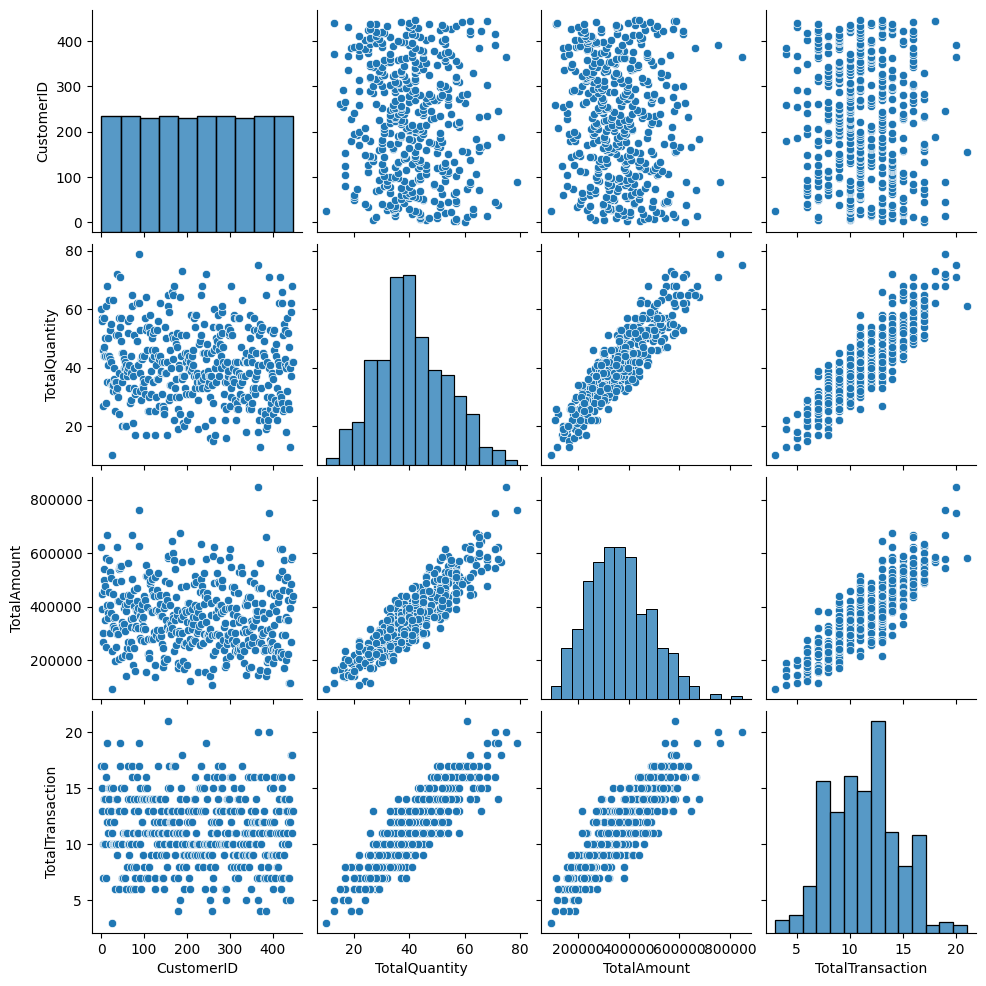

In [18]:
#lets show pairplot visualization
sns.pairplot(dc)


In [19]:
model = dc.drop(columns=['CustomerID']).copy()
model.columns

Index(['TotalQuantity', 'TotalAmount', 'TotalTransaction'], dtype='object')

In [20]:
features = ['txn','qty','amt']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(model) # Fitting and transforming the data
scaled_df = pd.DataFrame(scaled_data, columns=features)
scaled_df.head()

,txn,qty,amt
0,1.496527,2.094768,1.779816
1,1.261093,0.239269,0.545884
2,1.182615,0.672218,1.162850
3,0.397833,-0.482047,-0.379565
4,-1.093251,-0.754347,-1.305014


### Modeling & Evaluation

In [22]:
df_model = scaled_df.copy()

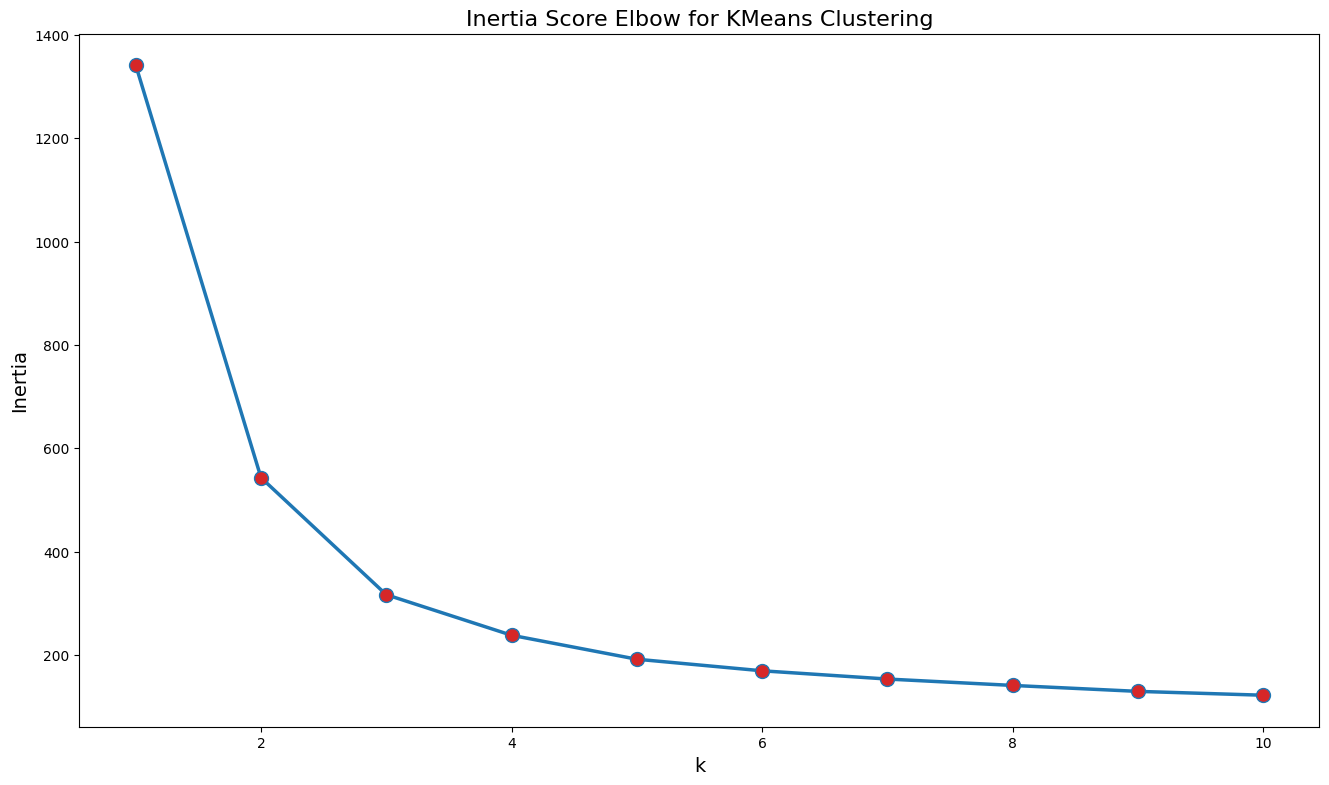

In [23]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,
                    max_iter=200, random_state=100)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 9))
plt.plot(range(1, 11),
         inertia,
         color='tab:blue',
         linewidth=2.5,
         marker='o',
         markerfacecolor='tab:red',
         markersize=10)
plt.xlabel('k', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.style.use('ggplot')
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=16)
plt.show()

***Observation***
* By using inertia score parameter, the optimal value is at K = 3, because inertia decrease is not too significant after that.


### Silhoutte Score

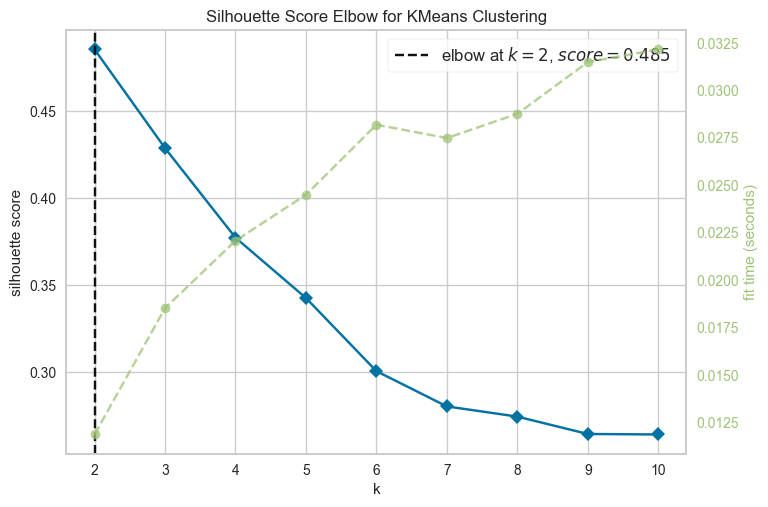

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_init=10, max_iter=200, random_state=100)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_model)
visualizer.show()

***Observation***
* On Silhouette score parameter, the optimal value is at K = 2 with score 0.480

In [25]:
model = df_model.copy()

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=200,
            random_state=100)
km.fit(model)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=100)

In [29]:
# Labels
model['Segment'] = km.labels_
model.groupby('Segment').agg(['std', 'mean', 'median'])

txn                           qty                           amt  \
              std      mean    median       std      mean    median       std   
Segment                                                                         
0        0.404383  0.020206  0.005443  0.426322  0.006065 -0.000902  0.469159   
1        0.462418 -1.098483 -1.014773  0.420937 -1.069309 -1.021828  0.536146   
2        0.553775  1.311033  1.261093  0.650428  1.301197  1.189108  0.549178   

                             
             mean    median  
Segment                      
0        0.015965 -0.071082  
1       -1.062798 -0.996531  
2        1.275025  1.162850

In [30]:
model.groupby('Segment').count()

,txn,qty,amt
Segment,,,
0,202,202,202
1,135,135,135
2,110,110,110


### Principal Component Analyst (PCA)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(model)
pca_tf = pca.transform(model)

pca_df = pd.DataFrame(pca_tf, columns=['pc1', 'pc2', 'pc3', 'pc4'])
pca_df.describe()

,pc1,pc2,pc3,pc4
count,447.000000,4.470000e+02,4.470000e+02,4.470000e+02
mean,0.000000,-7.947905e-18,-1.986976e-18,-4.967441e-18
std,1.700799,7.249348e-01,3.862028e-01,3.105185e-01
min,-3.955661,-1.041845e+00,-1.272345e+00,-7.545285e-01
25%,-1.054958,-7.432329e-01,-2.406142e-01,-2.294165e-01
50%,-0.307625,4.236723e-01,-5.505923e-03,-2.989085e-03
75%,0.863151,6.707706e-01,2.501984e-01,2.279496e-01
max,5.485169,1.175640e+00,1.354045e+00,8.970244e-01


Explained variance: [2.8927178  0.52553047 0.14915257 0.09642175]
Explained variance ratio: [0.78953544 0.14343775 0.04070955 0.02631726]


<BarContainer object of 4 artists>

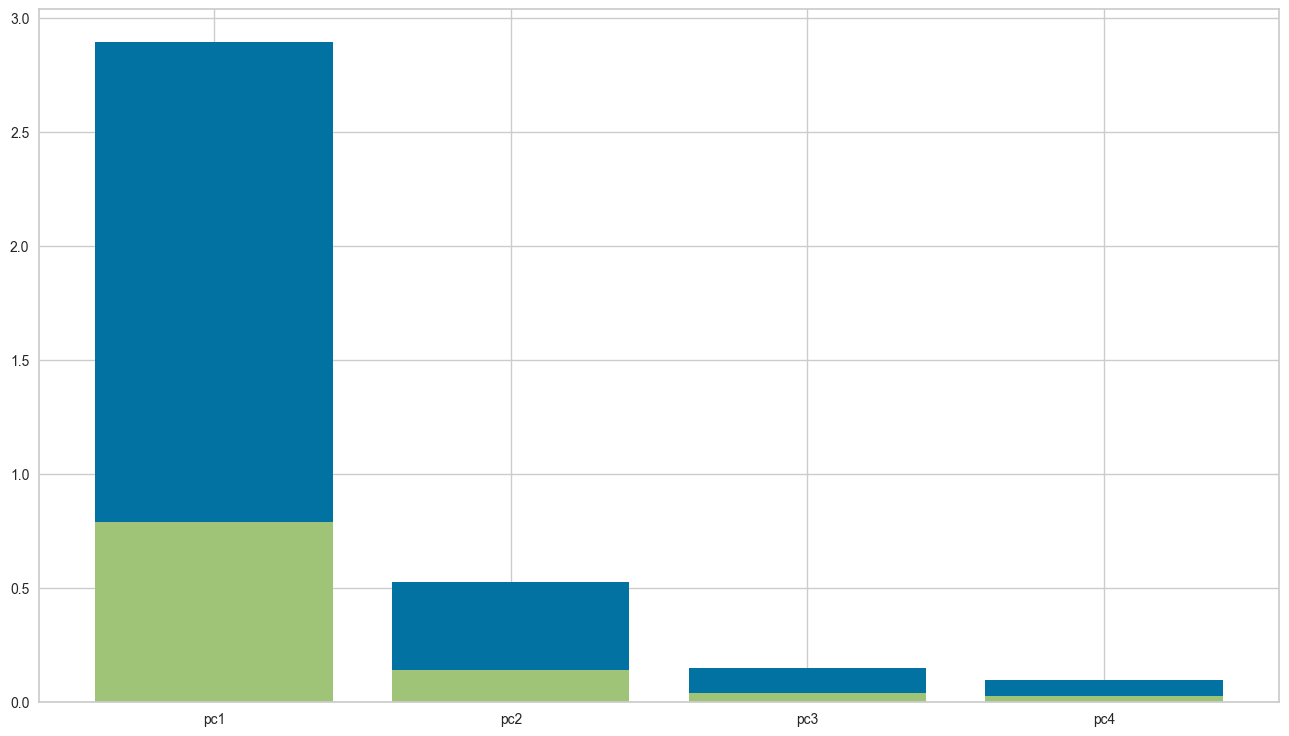

In [32]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.figure(figsize=(16, 9))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_)
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_ratio_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` be

<Figure size 1600x1600 with 0 Axes>

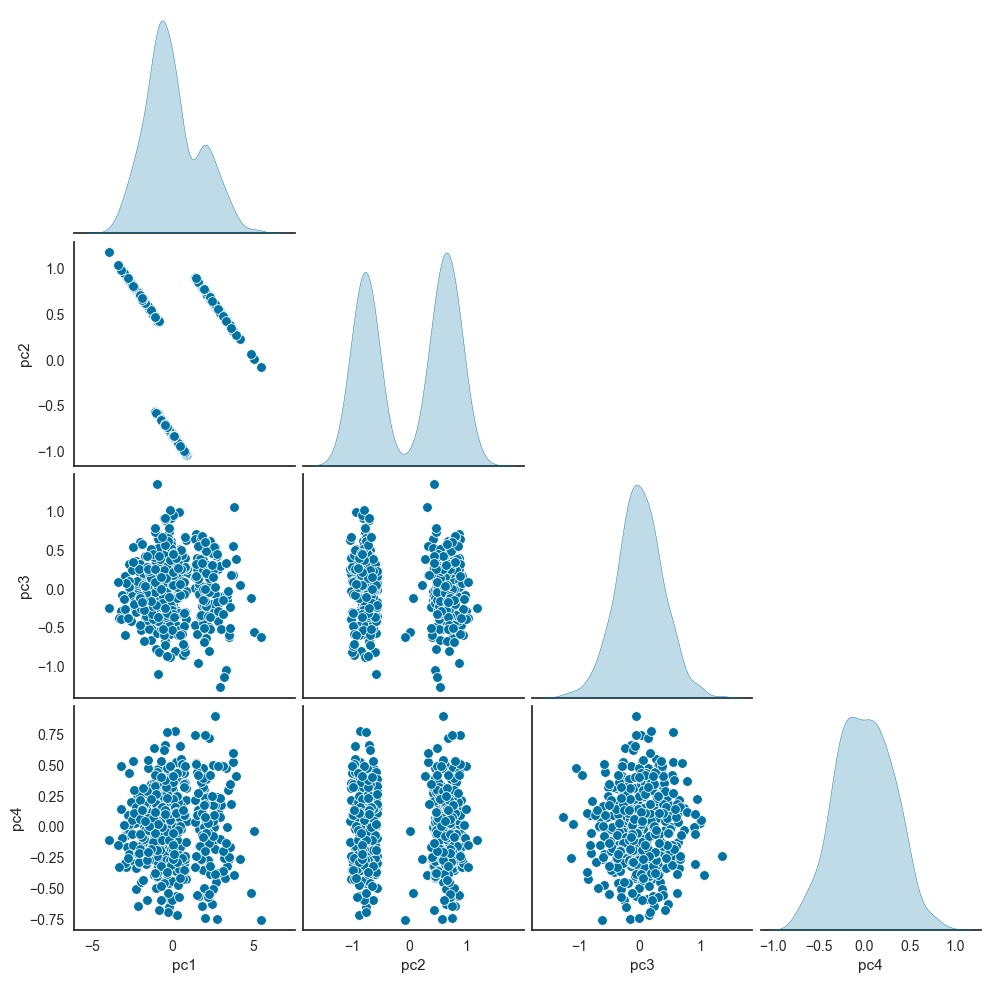

In [33]:
plt.figure(figsize=(16, 16))

sns.set_style('white')
sns.pairplot(data=pca_df,
             palette='viridis',
             diag_kind='kde',
             corner=True)

plt.show()

### Data Summary

In [34]:
data = data_clustering.copy()
data['Segment'] = km.labels_

In [53]:
features = ['TotalTransaction', 'TotalQuantity', 'TotalAmount', 'Segment']
data_summary = data[features]

summ = round(data_summary.groupby('Segment').agg(['median']), 2).round()
summ

,TotalTransaction,TotalQuantity,TotalAmount
,median,median,median
Segment,,,
0,11.0,41.0,362400.0
1,8.0,28.0,235300.0
2,15.0,57.0,510550.0


In [80]:
def dist_list(list):
    plt.figure(figsize=[16, 9])
    i = 1
    for col in list:
        ax = plt.subplot(1, 3, i)
        ax.vlines(data[col].median(), ymin=-0.5, ymax=2.5, color='black', linestyle='--')
        g = data.groupby('Segment')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x, y, color=['steelblue','purple','green'])
        plt.title(col)
        plt.ylabel('Segment')
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        i = i + 1

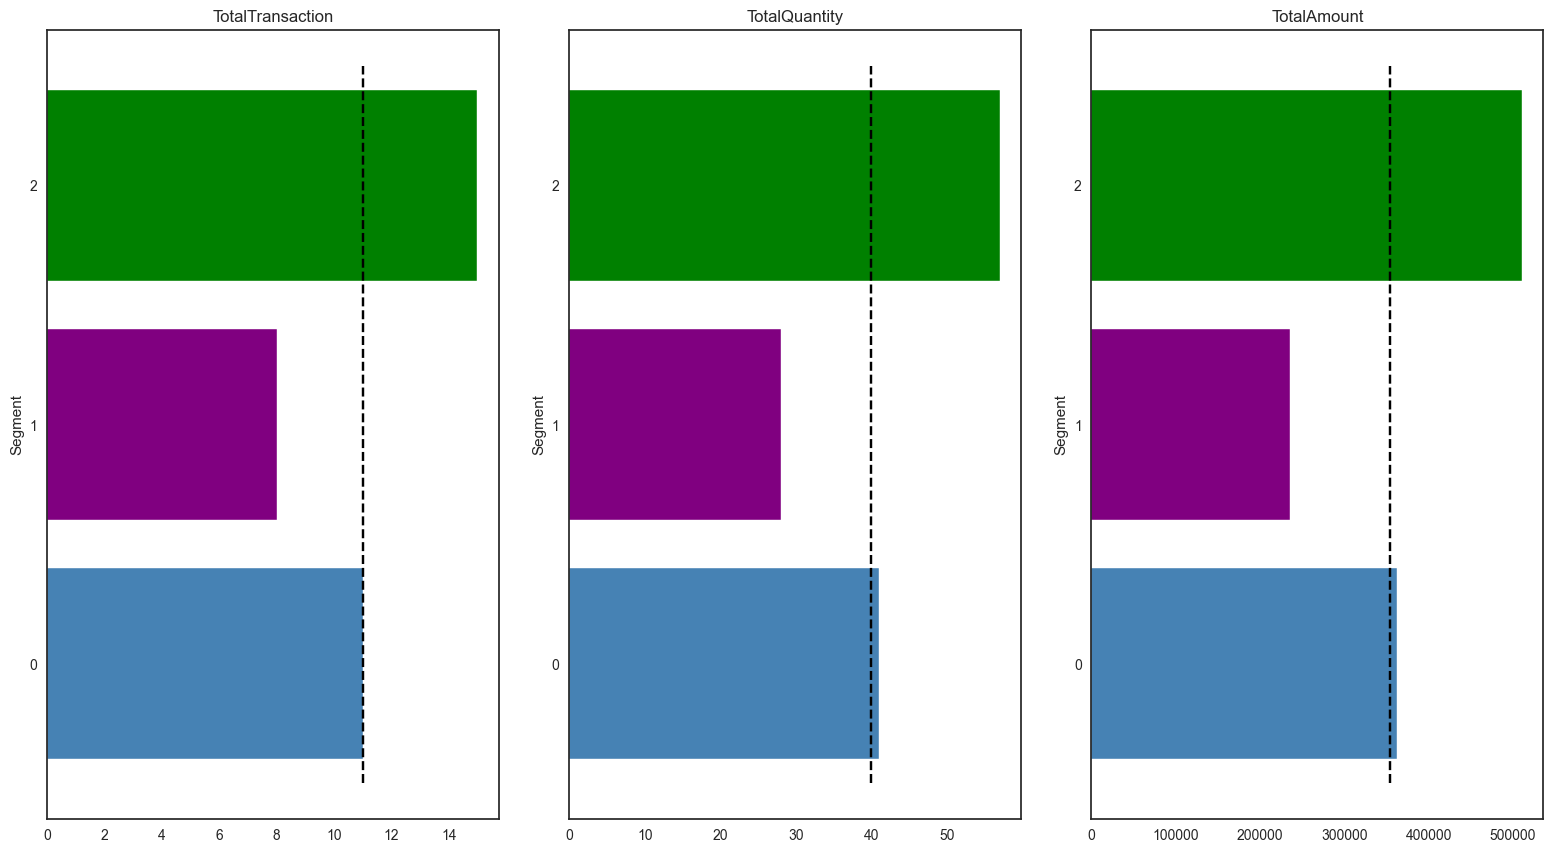

In [81]:
dist_list(['TotalTransaction', 'TotalQuantity', 'TotalAmount'])

plt.tight_layout(pad=2)
plt.show()

**Insights**
- Based on the results of K-Mean Clustering, it can be concluded that the characteristics of each cluster are as follows.
  - Cluster 0
    - Total transactions are 11 times (comparable to the average transactions per year).
    - Total product quantity is 41 pieces.
    - Total expenditure of Rp362,300/year.
  - Cluster 1
    - Total transactions were 15 times (above the average transactions per year).
    - Total product quantity is 57 pieces.
    - Total expenditure of IDR 509,900/year.
  - Cluster 2
    - Total transactions were 8 times (below the average transactions per year).
    - Total product quantity is 28 pieces.
    - Total expenditure amounted to IDR234,550/year.
- From these characteristics, each cluster can be categorized into the following segments.
  - Cluster 0: *Moderate Customer* Segment
  - Cluster 1: *High Customer* segment
  - Cluster 2: *Low Customer* Segment

### Model Interpretation and Recomendation

Percentage of Segment Population

In [82]:
segment_percent = data_summary['Segment'].value_counts().reset_index()
segment_percent.columns = ['Segment', 'Count']
segment_percent['Percentage (%)'] = round((segment_percent['Count'] / len(data_summary)) * 100, 1)
segment_percent = segment_percent.sort_values(by=['Segment']).reset_index(drop=True)
segment_percent

,Segment,Count,Percentage (%)
0,0,202,45.2
1,1,135,30.2
2,2,110,24.6


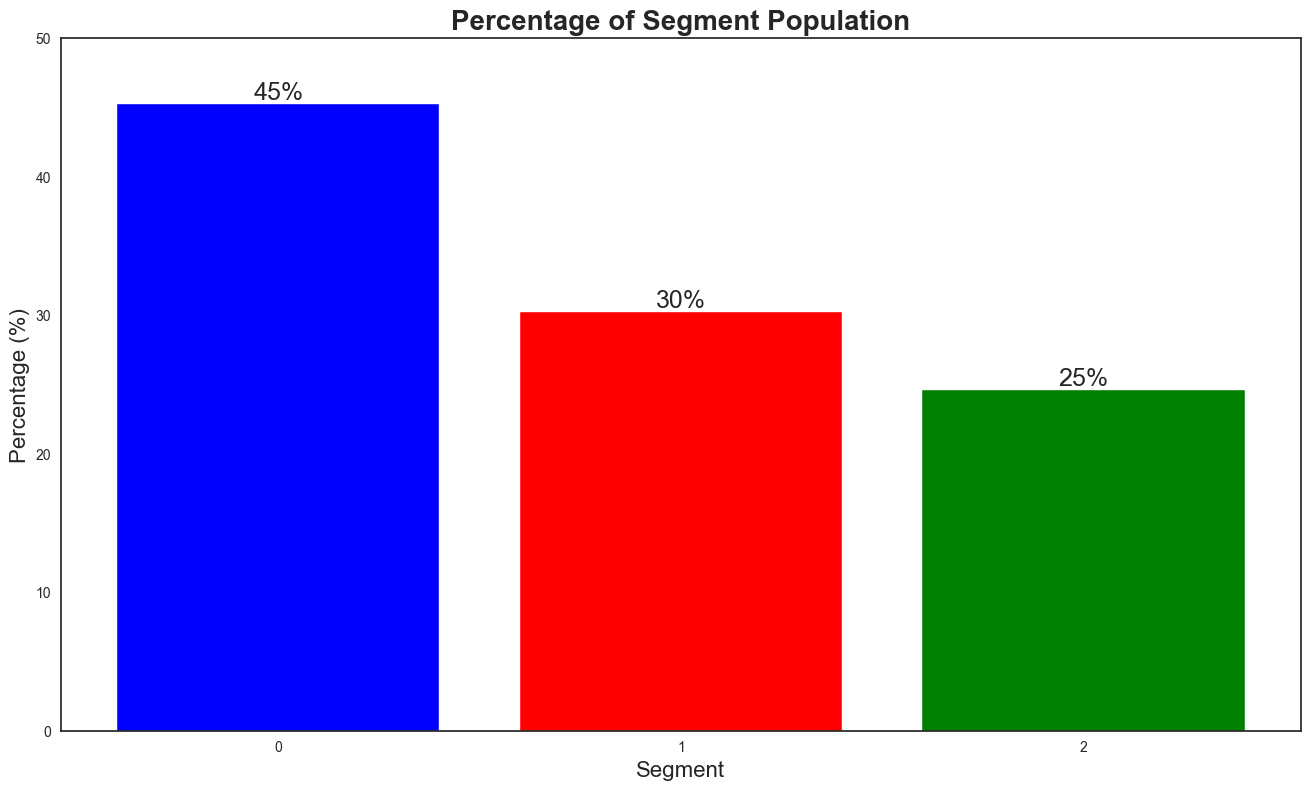

In [84]:
fig, ax = plt.subplots(figsize=(16, 9))
bars = plt.bar(x=segment_percent['Segment'], height=segment_percent['Percentage (%)'], color=['blue', 'red', 'green'])

plt.title('Percentage of Segment Population', fontsize=20, fontweight='bold')
plt.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=18)
plt.xlabel('Segment', fontsize=16)
plt.xticks(range(0, 3))
plt.ylabel('Percentage (%)', fontsize=16)
plt.ylim(0, 50)
plt.show()

**Insights**
- Based on the analysis results, it is known that:
  - *Moderate Customer* segment
    - This segment is the largest segment of the overall customers, accounting for 45% of the total customers.
    - The main characteristic of this segment is that it has a moderate amount of purchases and spending.
    - Companies can capitalize on the growth potential of this segment by paying more attention to them.
  - *High Customer* Segment
    - This segment has a high purchase and spending amount, despite having the smallest population of the overall customers.
    - This segment has great potential to contribute significant revenue to the company.
    - Companies can design effective business strategies to reach out to this segment to maximize their growth potential.
  - *Low Customer* Segment
    - This segment has a low number of purchases and expenditures, and has the lowest transactions of all customers.
    - However, the potential for increased transactions still exists, so the company can strengthen the purchasing activities of this segment.
    - The company can encourage increased transactions by providing attractive offers to this segment.